# Data Science on Weather Datasets
This project serves as a Data Science practice on the reading, curation, analysis and proposal of prediction models. The dataset used in this case is from  [Zeeshan Ahmad](https://www.kaggle.com/zeeshier)'s [Weather Forecast Dataset](https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset) published in Kaggle. It contains 2500 weather observations with attributes such as Temperature, Humidity, Wind Speed, Cloud Cover and Pressure. Given those attributes, The main goal is to predict whether it rains or not.

The project will be divided in four parts:
1. Data reading and curation: We read the csv file and look for missing and duplicate values.
2. Data analysis: We study the dataset mainly to look for two characteristics
    - Rain vs No rain proportions
    - Key categories
3. Possible models: The dataset page hinted three possible solutions such as logistic regression, decision trees, and random forests. We follow those possibilities but we also explain why other models, which involve SVM and clustering, might not be good enough for this project.
4. Conclusions and final thoughts: We determine which of the three solutions worked better. Moreover, we propose possible improvements for the dataset and the application of other models.

# Data reading
We import the main libraries we will use and read the downloaded CSV.

## Basic libraries

In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## CSV reading

In [457]:
# from kaggle https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset
weather_data = pd.read_csv("weather_forecast_data.csv")
weather_data.info()
weather_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


# Data curation
We check for possible missing or duplicate values. If encountered and not significant, we would delete them. Fortunately, this dataset did not have any of them.

## Missing values analysis

In [458]:
missing_values = weather_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(weather_data)) * 100
# Showing missing values
print("\nMissing values (absolute and percentage):")
missing_data = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percent
})
display(missing_data) # [missing_data["Missing Values"] >= 0]


Missing values (absolute and percentage):


,Missing Values,Percentage (%)
Temperature,0,0.0
Humidity,0,0.0
Wind_Speed,0,0.0
Cloud_Cover,0,0.0
Pressure,0,0.0
Rain,0,0.0


## Duplicate values analysis

In [459]:
duplicates = weather_data[weather_data.duplicated(keep=False)]
print(f"Duplicated rows: {duplicates.shape[0]}")

exact_duplicates_count = weather_data.duplicated(keep=False).sum()
print(f"Exact duplicated rows: {exact_duplicates_count}")

# Group by to verify repeating times
duplicates_grouped = weather_data.groupby(weather_data.columns.tolist()).size().reset_index(name='count')
exact_duplicates = duplicates_grouped[duplicates_grouped['count'] > 1]

print(f"Total of groups of duplicated rows: {len(exact_duplicates)}")

Duplicated rows: 0
Exact duplicated rows: 0
Total of groups of duplicated rows: 0


# Data analysis
Now we proceed with the analysis of the dataset

## Rain vs No rain proportions
The following histogram shows that there is an overrepresentation of "No rain" values against "Rain" ones. Since the weather observations have no timestamps nor geolocation details, we do not have any extra information of where the data is from. Therefore, we can only assume the data as it goes.

<Axes: xlabel='Rain', ylabel='Count'>

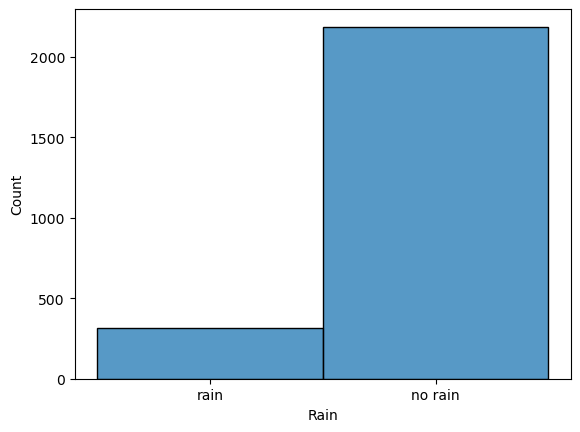

In [460]:
sns.histplot(data = weather_data['Rain'], binwidth = 0.5, discrete = True)

## Key categories
After taking into account the representation proportions, we compare the classes for each attribute using boxplots, histograms and scattering points with correlations. We can confirm that Temperature, Humidity and Cloud Cover play a significant role, as rainfall appears at low temperatures (10-25°C), high humidity (70-100%) and high cloud cover (50-100%). However, these correlations are not enough to separate "No Rain" instances from "Rain" ones as some of the former can match some of the latter in the same three key categories.

In [461]:
categories = list(weather_data.columns.values)
categories

['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain']

### Boxplots

In [462]:
def plot_boxplot(df,filter,columnx,columny):
    df_tmp = df
    for key in filter.keys():
        df_tmp = df_tmp[df_tmp[key].isin(filter[key])]
    ax = sns.boxplot(x = columnx, y = columny, data = df_tmp, width=.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

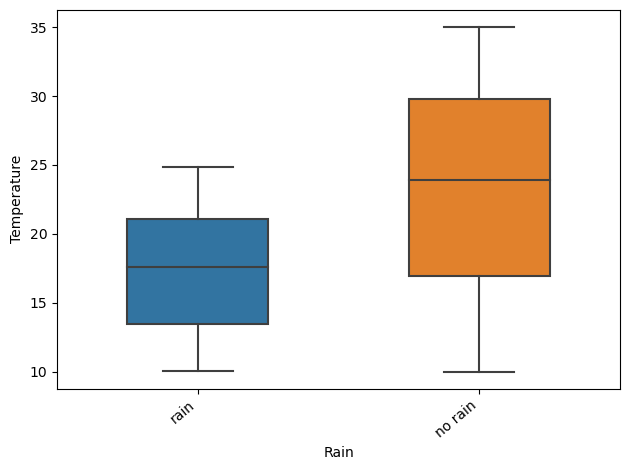

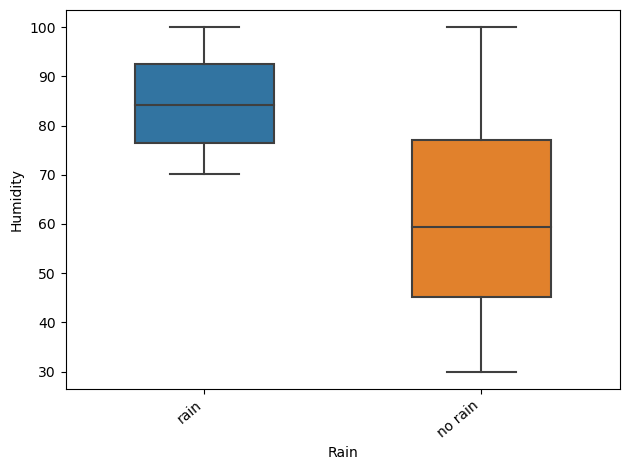

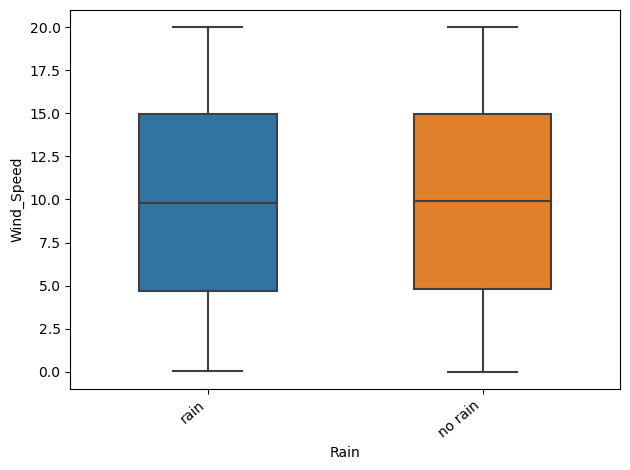

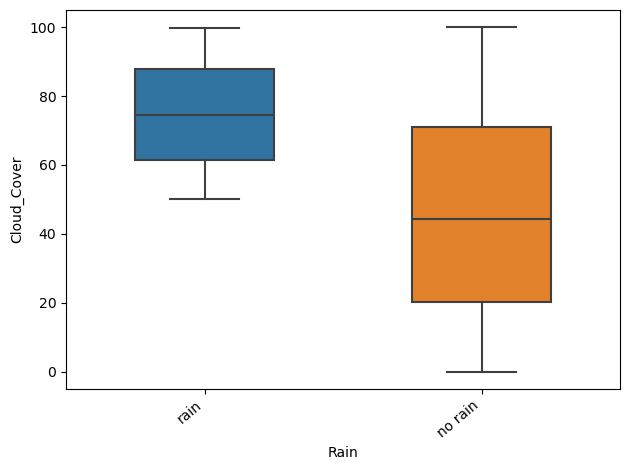

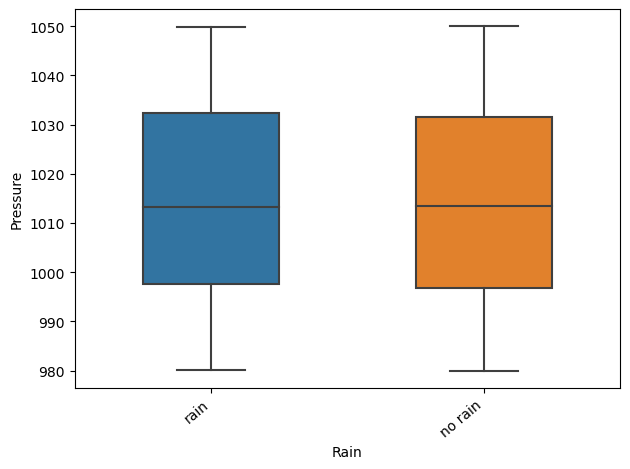

In [463]:
for category in categories:
    if category!='Rain':
        dicfil = {'Rain': ['rain','no rain']}
        plot_boxplot(weather_data,dicfil,'Rain',category)

### Histograms

In [464]:
def plot_two_histogram(df,filter,column):
    df_tmp = df
    for key in filter.keys():
        df_tmp = df_tmp[df_tmp[key].isin(filter[key])]
    df_tmp_a = df_tmp[df_tmp['Rain'] == 'rain']
    df_tmp_b = df_tmp[df_tmp['Rain'] == 'no rain']
    plt.title(column)
    plt.hist([df_tmp_a[column], df_tmp_b[column]], color=['r','b'], alpha=0.5)
    plt.legend(['rain','no rain'])
    plt.show()

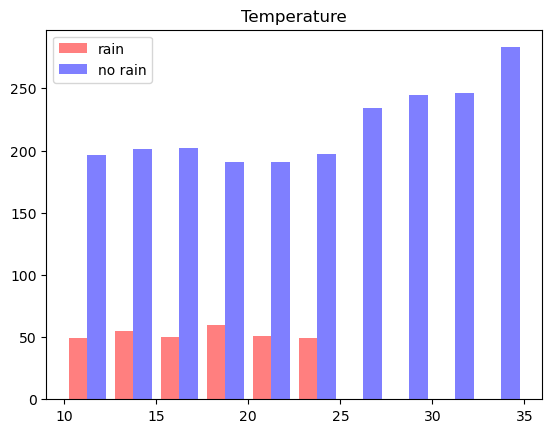

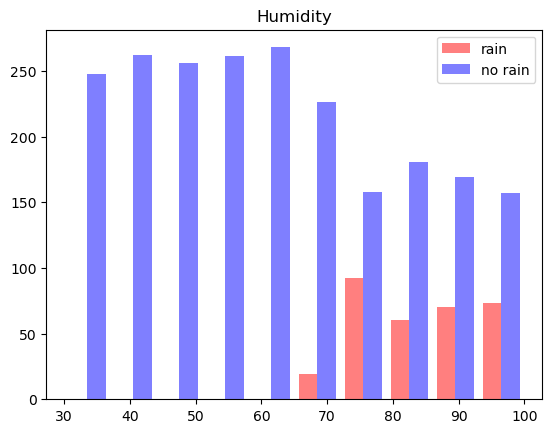

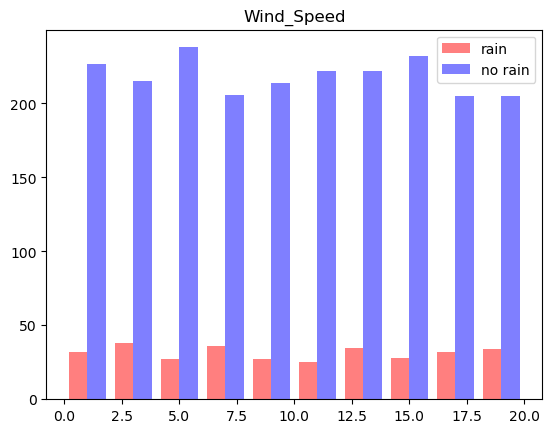

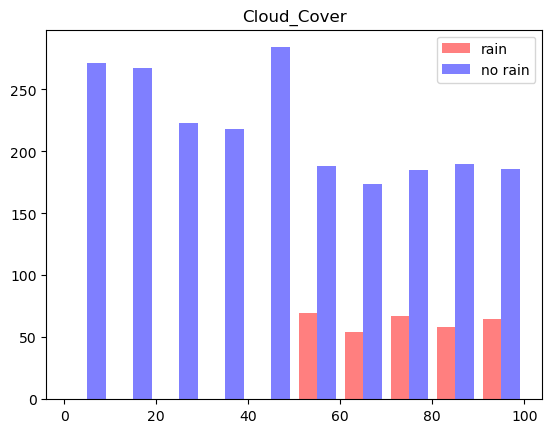

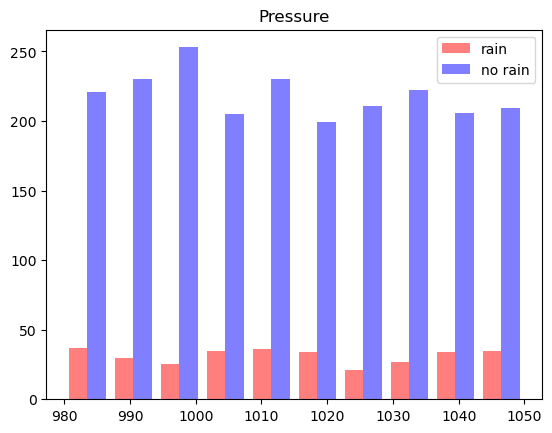

In [465]:
for category in categories:
    if category!='Rain':
        dicfil = {'Rain': ['rain','no rain']}
        plot_two_histogram(weather_data,dicfil,category)

### Correlation graphs


Temperature vs Humidity


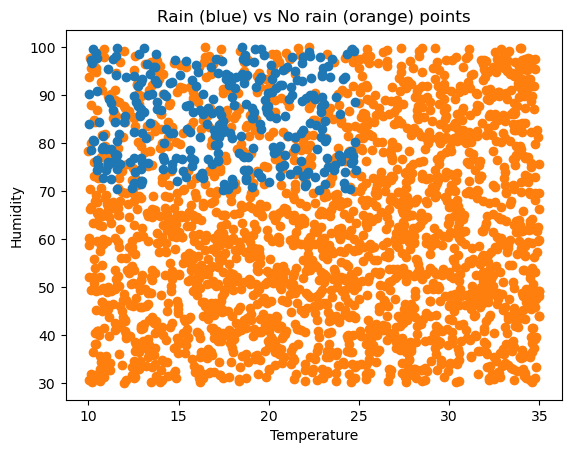

Temperature vs Wind_Speed


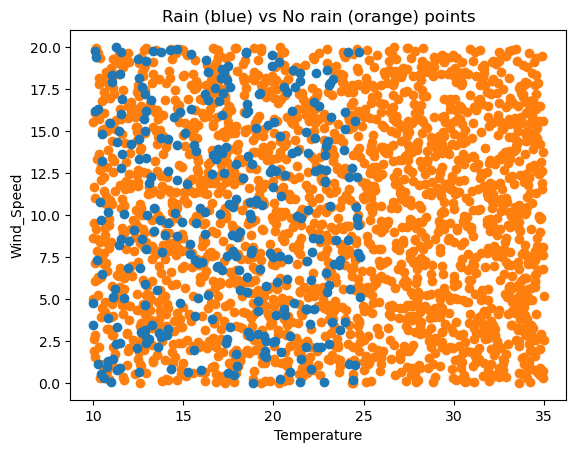

Temperature vs Cloud_Cover


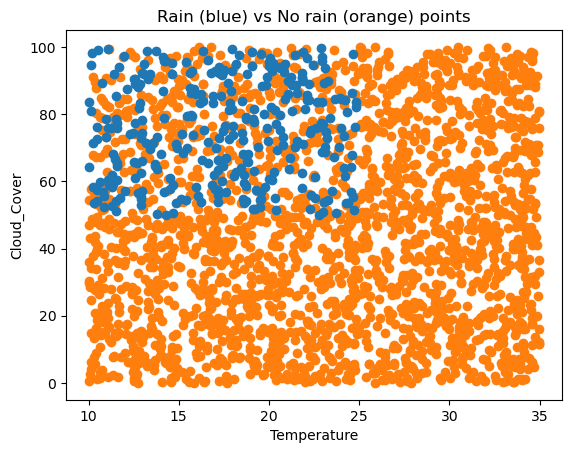

Temperature vs Pressure


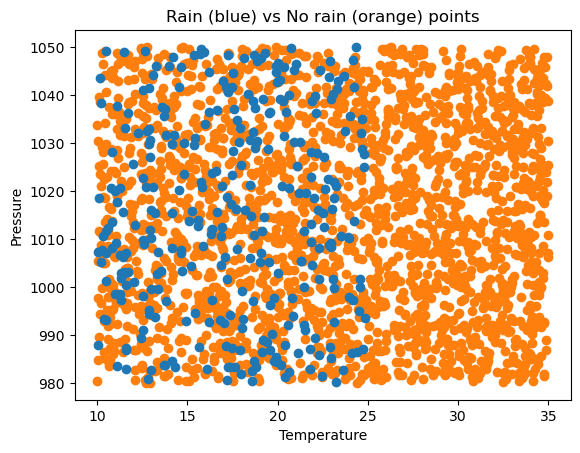

Humidity vs Wind_Speed


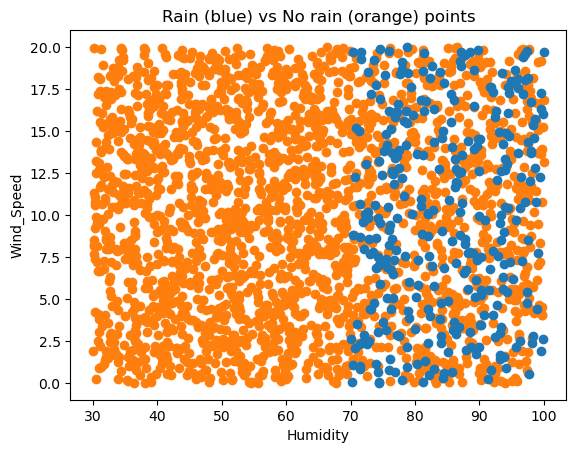

Humidity vs Cloud_Cover


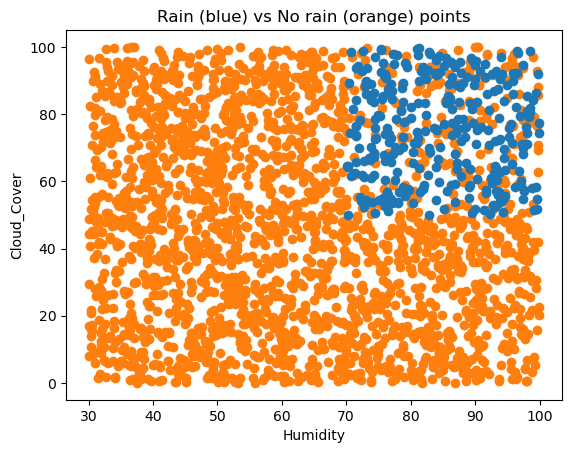

Humidity vs Pressure


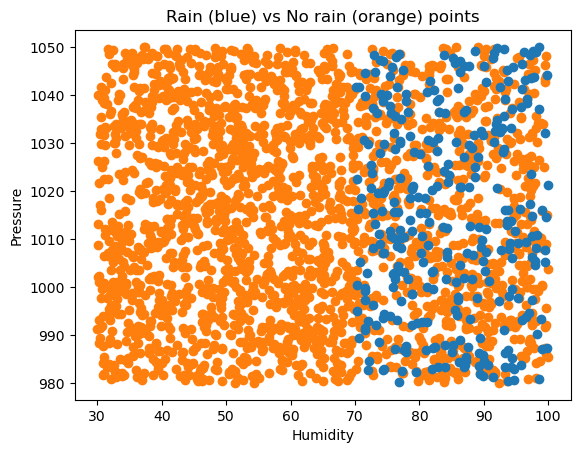

Wind_Speed vs Cloud_Cover


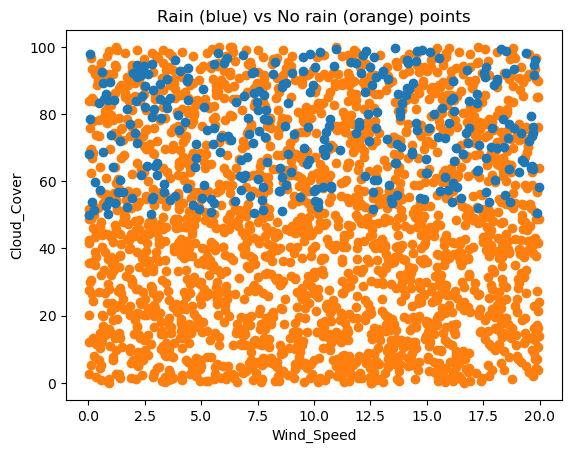

Wind_Speed vs Pressure


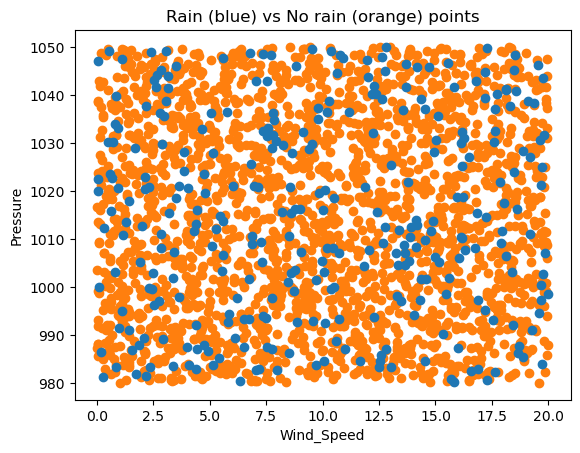

Cloud_Cover vs Pressure


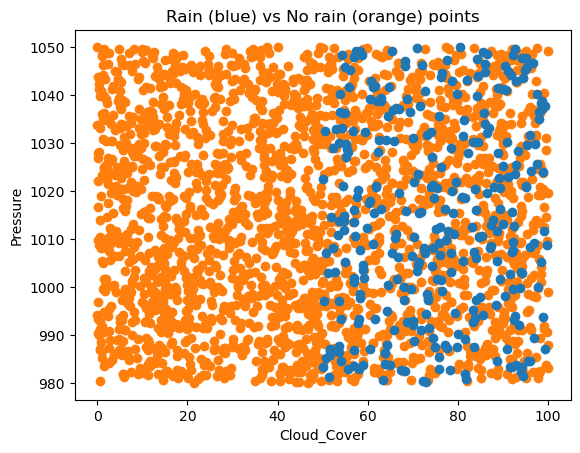

In [466]:
rain_data = weather_data[weather_data['Rain'] == 'rain']
no_rain_data = weather_data[weather_data['Rain'] == 'no rain']

for catindex1 in range(len(categories)-1):
    cat1 = categories[catindex1]
    for catindex2 in range(catindex1+1,len(categories)-1):
        cat2 = categories[catindex2]
        print(cat1,"vs",cat2)
        plt.title("Rain (blue) vs No rain (orange) points")
        plt.scatter(no_rain_data[cat1],no_rain_data[cat2],c='#ff7f0e')
        plt.scatter(rain_data[cat1],rain_data[cat2],c='#1f77b4')
        plt.xlabel(cat1)
        plt.ylabel(cat2)
        plt.show()

# Prediction models
Having analysed the dataset and its properties, we can finally go to the suggested algorithms. However, before doing that we must take a detour and explain why we are not considering other models.

## Why not others?
Since the "Rain" and "No Rain" classes are deeply intertwined, unless we have new attributes or deduce other properties from the current dataset, models such as linear regression or SVM might not useful. Moreover, clustering algorithms (e.g. k-means), at least for exploratory reasons, are not reasonable.

Thus, given the dataset conditions, we follow the hinted models mentioned at the beginning. Logistic regression proposes a separation using a logit function. Although some of the attributes do not resemble normal distributions, for this case we deal the data in two scenarios: one using StandardScaler and another without it. Meanwhile, decision trees and random forests are worth trying as we have the three key attributes we noted before (Temperature, Humidity and Cloud Cover).

In all cases, we expect the amount of misclassification for 'Rain' cases to be higher than the 'No Rain' ones.

## Train & test preliminaries
We begin this section by importing the necessary libraries for all the proposed solutions, defining the train and test sets and its standardized counterparts. For coding clarity, we define two key functions: one in which we use the model for fitting and prediction and another for printing the metrics and confusion matrices.

In [467]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X = weather_data.loc[:, weather_data.columns != 'Rain']
y = [1 if x=='rain' else 0 for x in weather_data['Rain']] #weather_data['Rain']
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3,random_state=13)
display(X)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


In [468]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [470]:
def fit_and_predict(model,X_train,y_train,X_test):
    fit_model = model.fit(X_train,y_train)
    y_train_pred = fit_model.predict(X_train)
    y_test_pred = fit_model.predict(X_test)
    return y_train_pred,y_test_pred

def print_metrics(y_true,y_pred,title=""):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print(f"Score: {accuracy_score(y_true,y_pred)}") # model.score(X,y)
    print(f"TPR ('Rain' correct rate): {tp / (tp + fn)}")
    print(f"FNR ('Rain' incorrect rate): {fn / (fn + tp)}")
    print(f"TNR ('No Rain' correct rate): {tn / (tn + fp)}")
    print(f"FPR ('No Rain' incorrect rate): {fp / (fp + tn)}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Rain','Rain'])
    disp.plot()
    plt.title(title)
    plt.show()

## Logistic regression

Logistic regression proposes a separation using a logit function. Although some of the attributes do not resemble normal distributions, for this model we deal the data in two scenarios: one using StandardScaler and another without it.

The results show that non-standardized dataset classifies 'Rain' instances better than the standardized version, whereas the reverse happens with 'No Rain' instances. However, the differences are slight and in both cases the accuracy score is around 0.93.

Due to the overrepresentation problem of the 'No Rain' class, missclasification of the 'Rain' class stays at a not insignificant 0.25-0.28.

### Without StandardScaler

In [471]:
y_train_pred,y_test_pred = fit_and_predict(LogisticRegression(random_state=11),X_train,y_train,X_test)

In [472]:
#print_metrics(y_train,y_train_pred)

TN: 620, FP: 30, FN: 25, TP: 75
Score: 0.9266666666666666
TPR ('Rain' correct rate): 0.75
FNR ('Rain' incorrect rate): 0.25
TNR ('No Rain' correct rate): 0.9538461538461539
FPR ('No Rain' incorrect rate): 0.046153846153846156


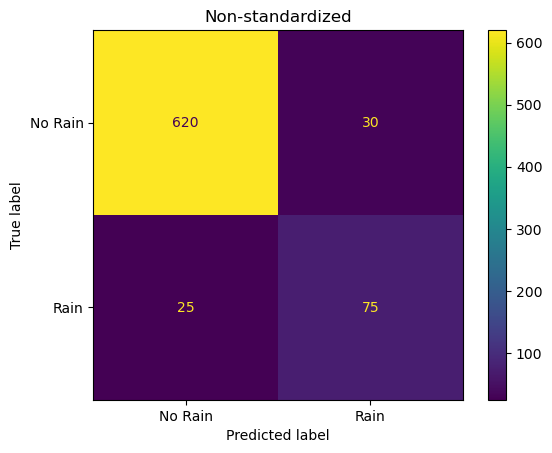

In [473]:
print_metrics(y_test,y_test_pred,title='Non-standardized')

### With StandardScaler

In [474]:
y_train_pred,y_test_pred = fit_and_predict(LogisticRegression(random_state=11),X_train_scaled,y_train,X_test_scaled)

In [475]:
#print_metrics(y_train,y_train_pred)

TN: 624, FP: 26, FN: 28, TP: 72
Score: 0.928
TPR ('Rain' correct rate): 0.72
FNR ('Rain' incorrect rate): 0.28
TNR ('No Rain' correct rate): 0.96
FPR ('No Rain' incorrect rate): 0.04


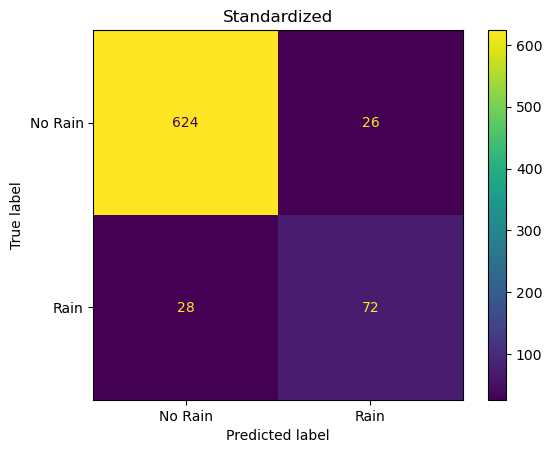

In [476]:
print_metrics(y_test,y_test_pred,title='Standardized')

## Decision trees

Taking into account the three key attributes Temperature, Humidity and Cloud Cover, it is reasonable to consider decision trees, as it will take a couple of choices to classify the test data.

Surprisingly enough, there are no misclassification and accuracy gets to 1.0. As expected, the decision tree goes through the order Humidity -> Cloud Cover -> Temperature and does not consider Wind Speed nor Pressure. A reason of why it has these perfect metrics might be due to:
1. the training set is sufficiently large, 70% of the instances, or
2. the dataset origin, which is limited to a certain region where rainfall only appears in the case with Humidity is higher than 70%, Cloud Cover is above 50% and Temperature is below 24°C.

This is a situation where the right tool was implemented for this dataset. Other instances where rainfall does not coincide with the conditions previously mentioned, might require having another training process or changing to other models.

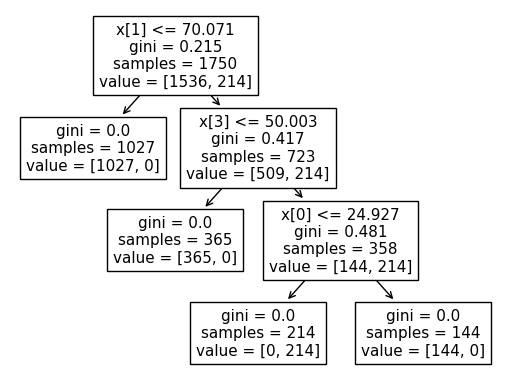

In [477]:
tree_clf_regular = tree.DecisionTreeClassifier().fit(X_train, y_train)
tree.plot_tree(tree_clf_regular)
y_train_pred,y_test_pred = fit_and_predict(tree.DecisionTreeClassifier(),X_train,y_train,X_test)

In [478]:
#print_metrics(y_train,y_train_pred)

TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


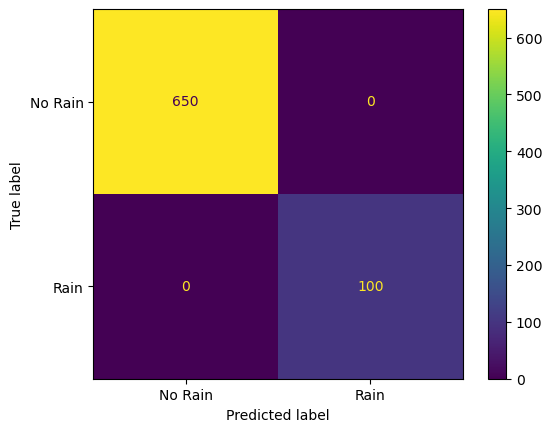

In [479]:
print_metrics(y_test,y_test_pred)

## Random forests

Finally, we get to random forest, a model which combines different decision trees. This might be 'overkill' for the current dataset as it has few attributes and we have our classification problem solved with one tree. However, it is worth trying, at least for finding which values of the random forest are worse than the previous model.

We test by varying the number of estimators and the maximum depth for each of the decision trees. We find that for almost all estimators from depth 3 and above, misclassification sharply declines which is in line with what happened to original decision tree. However, in the case of one estimator, random forest cannot match the metrics of the prior method.

Trees: 1, Depth: 1
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


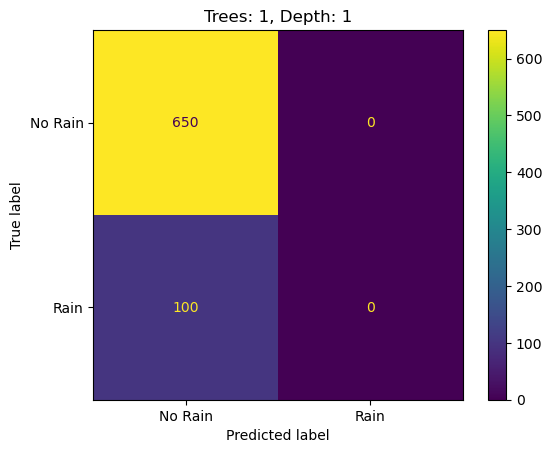

Trees: 1, Depth: 2
TN: 551, FP: 99, FN: 0, TP: 100
Score: 0.868
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 0.8476923076923077
FPR ('No Rain' incorrect rate): 0.1523076923076923


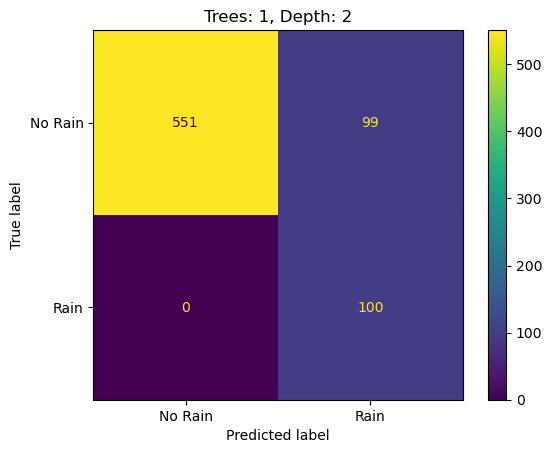

Trees: 1, Depth: 3
TN: 624, FP: 26, FN: 72, TP: 28
Score: 0.8693333333333333
TPR ('Rain' correct rate): 0.28
FNR ('Rain' incorrect rate): 0.72
TNR ('No Rain' correct rate): 0.96
FPR ('No Rain' incorrect rate): 0.04


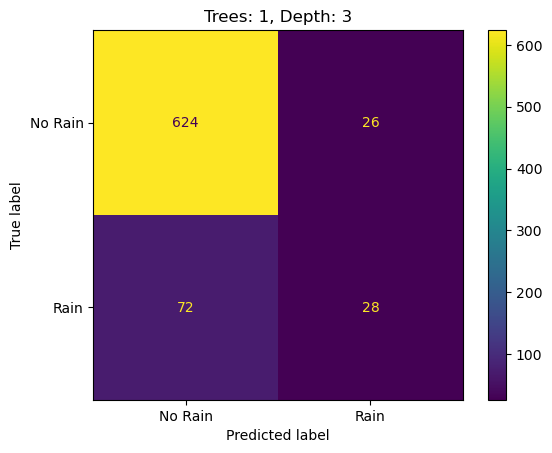

Trees: 1, Depth: 4
TN: 624, FP: 26, FN: 0, TP: 100
Score: 0.9653333333333334
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 0.96
FPR ('No Rain' incorrect rate): 0.04


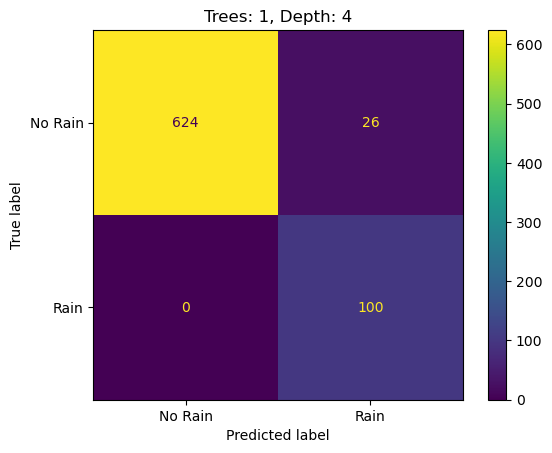

Trees: 5, Depth: 1
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


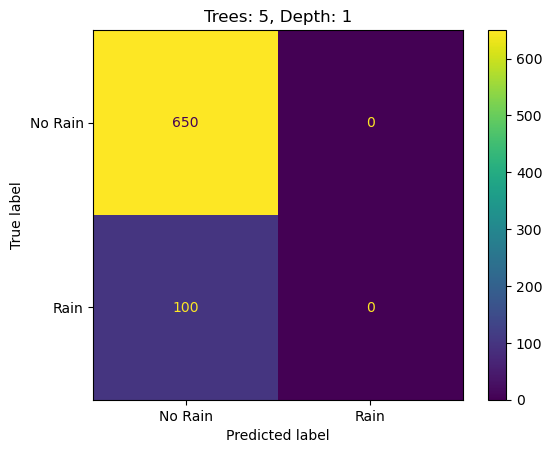

Trees: 5, Depth: 2
TN: 650, FP: 0, FN: 99, TP: 1
Score: 0.868
TPR ('Rain' correct rate): 0.01
FNR ('Rain' incorrect rate): 0.99
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


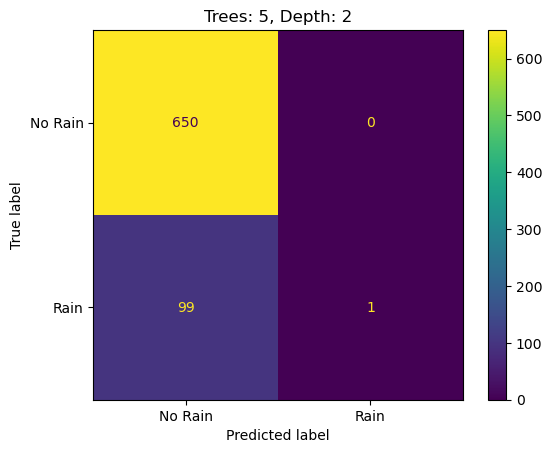

Trees: 5, Depth: 3
TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


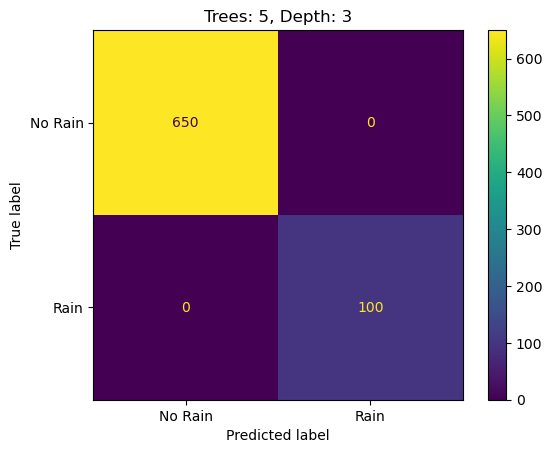

Trees: 5, Depth: 4
TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


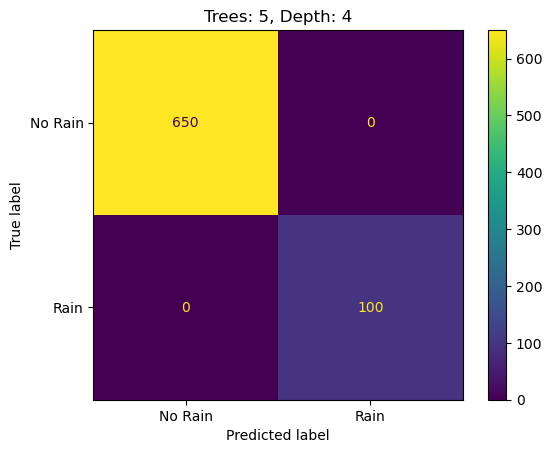

Trees: 20, Depth: 1
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


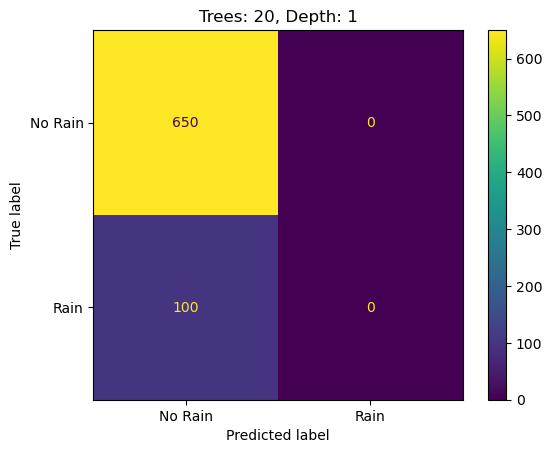

Trees: 20, Depth: 2
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


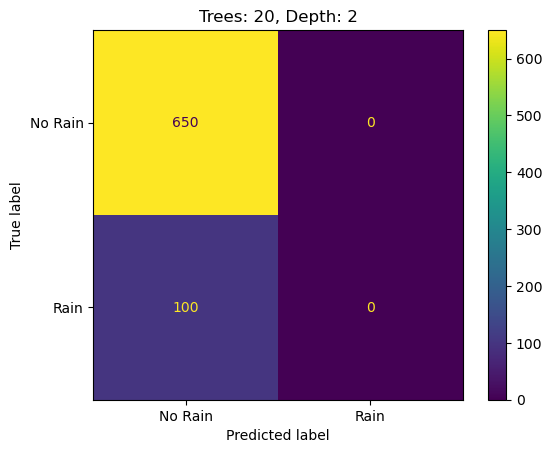

Trees: 20, Depth: 3
TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


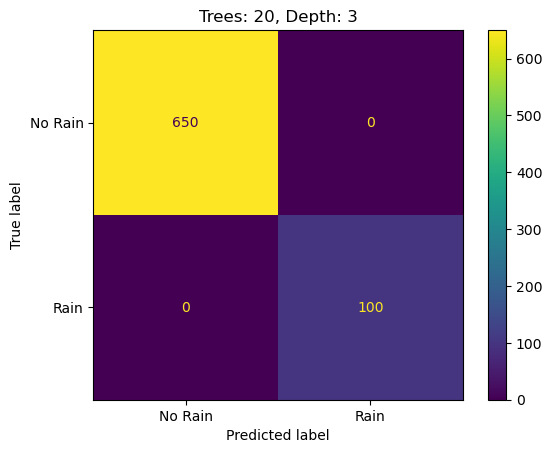

Trees: 20, Depth: 4
TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


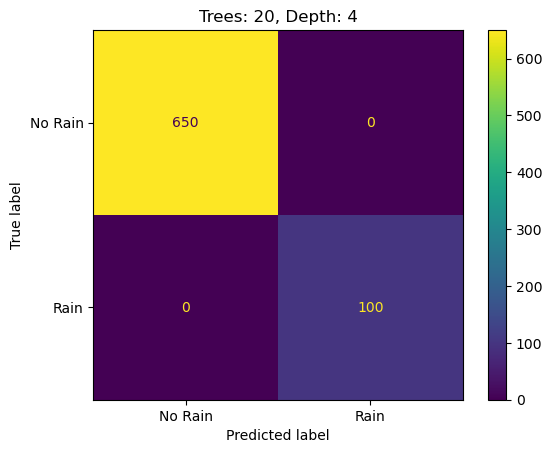

Trees: 50, Depth: 1
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


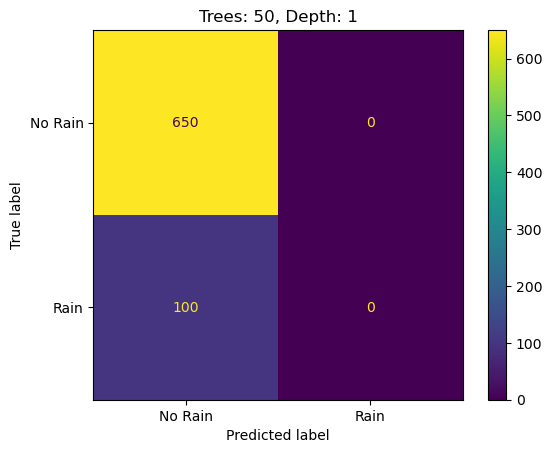

Trees: 50, Depth: 2
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


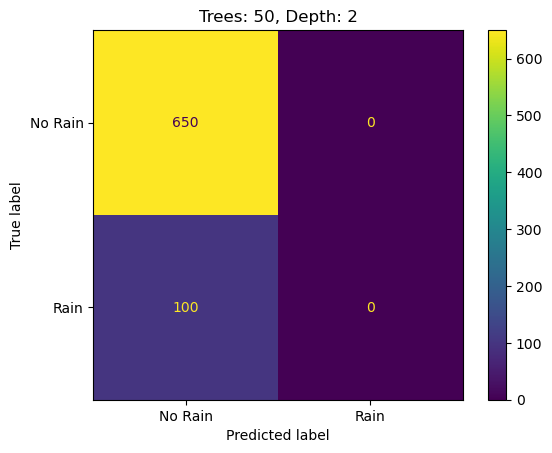

Trees: 50, Depth: 3
TN: 650, FP: 0, FN: 1, TP: 99
Score: 0.9986666666666667
TPR ('Rain' correct rate): 0.99
FNR ('Rain' incorrect rate): 0.01
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


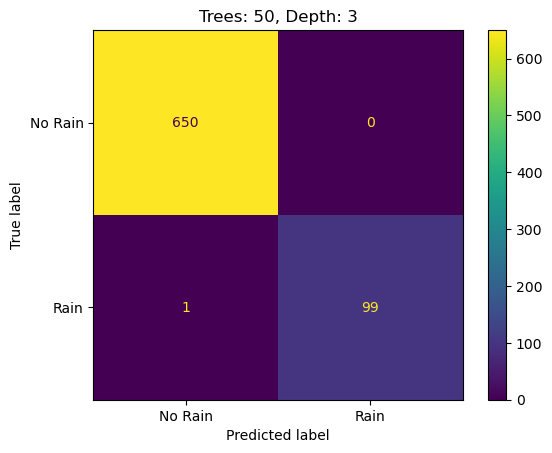

Trees: 50, Depth: 4
TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


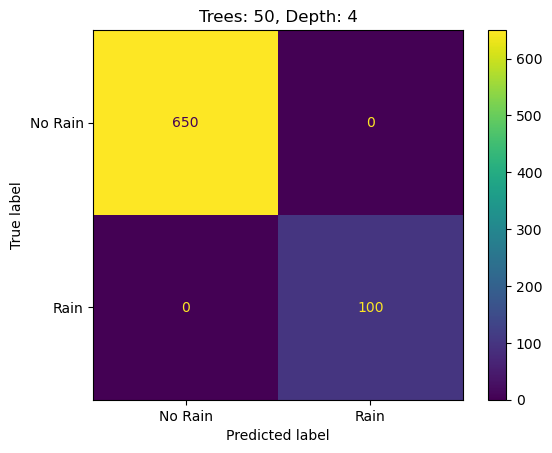

Trees: 100, Depth: 1
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


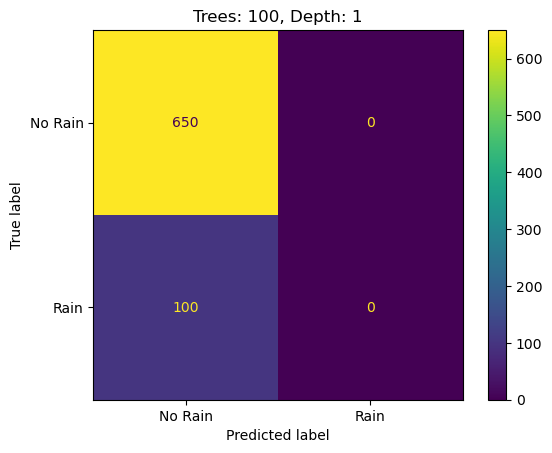

Trees: 100, Depth: 2
TN: 650, FP: 0, FN: 100, TP: 0
Score: 0.8666666666666667
TPR ('Rain' correct rate): 0.0
FNR ('Rain' incorrect rate): 1.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


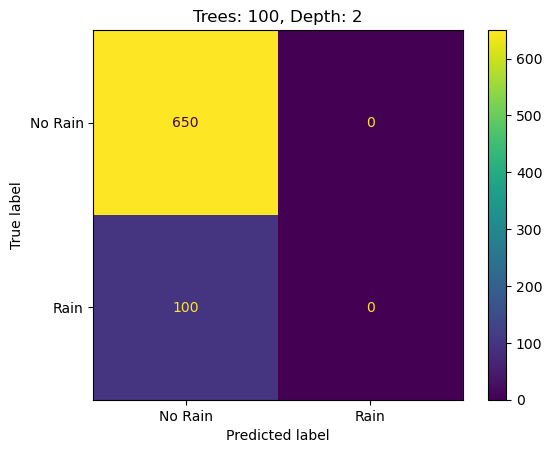

Trees: 100, Depth: 3
TN: 650, FP: 0, FN: 1, TP: 99
Score: 0.9986666666666667
TPR ('Rain' correct rate): 0.99
FNR ('Rain' incorrect rate): 0.01
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


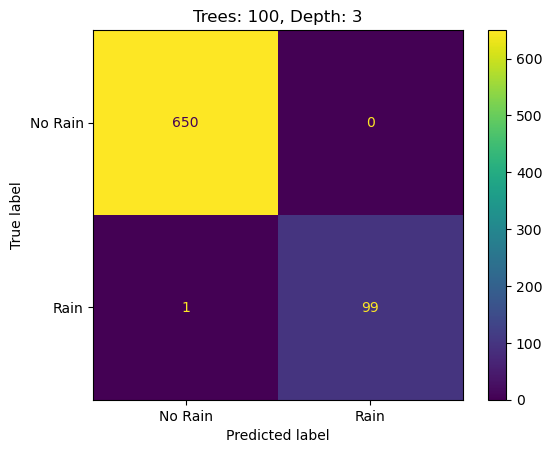

Trees: 100, Depth: 4
TN: 650, FP: 0, FN: 0, TP: 100
Score: 1.0
TPR ('Rain' correct rate): 1.0
FNR ('Rain' incorrect rate): 0.0
TNR ('No Rain' correct rate): 1.0
FPR ('No Rain' incorrect rate): 0.0


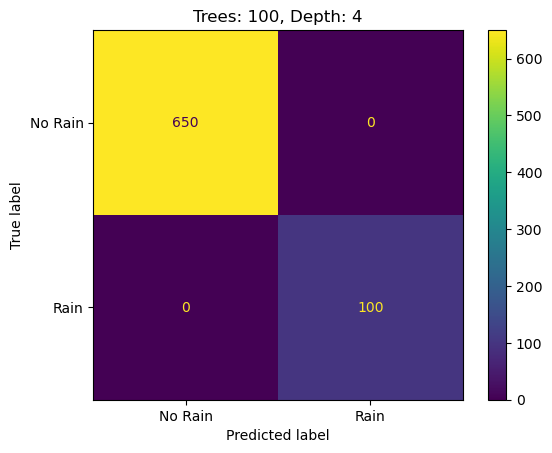

In [480]:
for estimators in [1,5,20,50,100]:
    for depth in [1,2,3,4]:
        model = RandomForestClassifier(
            n_estimators=estimators,
            max_depth=depth,
            random_state=0
        )
        y_train_pred,y_test_pred = fit_and_predict(model,X_train,y_train,X_test)
        print(f"Trees: {estimators}, Depth: {depth}")
        print_metrics(y_test,y_test_pred,title=f"Trees: {estimators}, Depth: {depth}")


# Conclusions and final thoughts

In this project we took a weather dataset and analysed its attributes. We determined three key ones (Temperature, Humidity and Cloud Cover) and applied three recommended models: logistical regression, decision tree and random forest. The first one had satisfactory results. However, due to its overrepresentation problem, it misclassified 'Rain' instances proportionally more than 'No Rain' ones. The second one, surprisingly had a 1.0 accuracy. It was enough to have a tree with depth 3 to be able to correctly classify each of the test instances. Finally, having checked for diferent numbers of estimators and maximum depths, the third perform better than the logistical regression in some cases, but not as good as the decision tree in terms of resource usage.

In conclusion, considering the current dataset, the best model was a decision tree.

Now, although the main goal of this dataset is just to try different models, there is still room for possible additions. For example, it can provide timestamps which can give us information whether rainfall is more usual at a certain time of the day, month or year; or even geolocation details in order to cross-reference it with other datasets for a more thorough curation. These additions would open the possibility of using other types of models and comparing their performances.